# Imports

In [2]:
import pickle
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]

# custom functions
import sys
sys.path.append(r"C:\Users\User\Documents\projects\LHL_final_project_influenza_forecasting\src")
from evaluate_model import *

# Datasets

In [90]:
df_time_features_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_time_features_pre_COVID.pkl", "rb" ))
df_time_features = pickle.load(open(r"..\data\flu_cases\df_time_features.pkl", "rb" ))

df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))
df_flu = pickle.load(open(r"..\data\flu_cases\df_flu_total.pkl", "rb" ))

# LSTM - pre-COVID

In [59]:
df_time_features_pre_COVID = df_time_features_pre_COVID.dropna().reset_index(drop=True)

In [60]:
df_time_features_pre_COVID

,Total Cases,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,this week last year,two-week moving average,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,season_Spring,season_Summer,season_Winter
0,2.0,13.0,13.0,8.0,9.0,7.0,18.0,10.0,9.0,13.0,...,0,0,0,0,0,0,1,0,0,0
1,18.0,2.0,13.0,13.0,8.0,9.0,7.0,18.0,18.0,7.5,...,0,0,0,0,0,0,1,0,0,0
2,23.0,18.0,2.0,13.0,13.0,8.0,9.0,7.0,15.0,10.0,...,0,0,0,0,0,0,1,0,0,0
3,44.0,23.0,18.0,2.0,13.0,13.0,8.0,9.0,29.0,20.5,...,0,0,0,0,0,0,1,0,0,0
4,63.0,44.0,23.0,18.0,2.0,13.0,13.0,8.0,59.0,33.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,4789.0,4182.0,3549.0,3811.0,3845.0,3126.0,2206.0,1290.0,2037.0,3865.5,...,0,0,0,0,0,0,0,0,0,1
179,4654.0,4789.0,4182.0,3549.0,3811.0,3845.0,3126.0,2206.0,1709.0,4485.5,...,0,0,0,0,0,0,0,0,0,1
180,3989.0,4654.0,4789.0,4182.0,3549.0,3811.0,3845.0,3126.0,1521.0,4721.5,...,0,0,0,0,0,0,0,0,0,1
181,3656.0,3989.0,4654.0,4789.0,4182.0,3549.0,3811.0,3845.0,1558.0,4321.5,...,0,0,0,0,0,0,0,0,0,1


In [61]:
df_time_features_pre_COVID.columns

Index(['Total Cases', 't - 1', 't - 2', 't - 3', 't - 4', 't - 5', 't - 6',
       't - 7', 'this week last year', 'two-week moving average',
       'expanding mean', 'year_2016', 'year_2017', 'year_2018', 'year_2019',
       'year_2020', 'year_2021', 'year_2022', 'month_10', 'month_11',
       'month_12', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')

In [62]:
# split into train and test
X = df_time_features_pre_COVID.loc[:, df_time_features_pre_COVID.columns != 'Total Cases']
y = df_time_features_pre_COVID['Total Cases']

train_X = X.iloc[:-1]
train_y = y.iloc[:-1]
test_X = X.iloc[-1]
test_y = np.asarray(y.iloc[-1])

# train_X = X.iloc[:-1].to_numpy()
# train_y = y.iloc[:-1].to_numpy().reshape(-1,1)
# test_X = X.iloc[-1].to_numpy().reshape(1,-1)
# test_y = np.asarray(y.iloc[-1]).reshape(1,-1)

# train_X = X.iloc[:-1].to_numpy()
# train_y = y.iloc[:-1].to_numpy().reshape(-1,1)
# test_X = X.iloc[-1:].to_numpy()
# test_y = np.asarray(y.iloc[-1:]).reshape(-1,1)

print(f'Shape of train_X: {train_X.shape}')
print(f'Shape of train_y: {train_y.shape}')
print(f'Shape of test_X: {test_X.shape}')
print(f'Shape of test_y: {test_y.shape}')

Shape of train_X: (182, 31)
Shape of train_y: (182,)
Shape of test_X: (31,)
Shape of test_y: ()


In [63]:
train_X

,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,this week last year,two-week moving average,expanding mean,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,season_Spring,season_Summer,season_Winter
0,13.0,13.0,8.0,9.0,7.0,18.0,10.0,9.0,13.0,757.173077,...,0,0,0,0,0,0,1,0,0,0
1,2.0,13.0,13.0,8.0,9.0,7.0,18.0,18.0,7.5,742.924528,...,0,0,0,0,0,0,1,0,0,0
2,18.0,2.0,13.0,13.0,8.0,9.0,7.0,15.0,10.0,729.500000,...,0,0,0,0,0,0,1,0,0,0
3,23.0,18.0,2.0,13.0,13.0,8.0,9.0,29.0,20.5,716.654545,...,0,0,0,0,0,0,1,0,0,0
4,44.0,23.0,18.0,2.0,13.0,13.0,8.0,59.0,33.5,704.642857,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,3549.0,3811.0,3845.0,3126.0,2206.0,1290.0,737.0,2156.0,3680.0,927.908297,...,0,0,0,0,0,0,0,0,0,1
178,4182.0,3549.0,3811.0,3845.0,3126.0,2206.0,1290.0,2037.0,3865.5,942.056522,...,0,0,0,0,0,0,0,0,0,1
179,4789.0,4182.0,3549.0,3811.0,3845.0,3126.0,2206.0,1709.0,4485.5,958.709957,...,0,0,0,0,0,0,0,0,0,1
180,4654.0,4789.0,4182.0,3549.0,3811.0,3845.0,3126.0,1521.0,4721.5,974.637931,...,0,0,0,0,0,0,0,0,0,1


In [64]:
train_y

0         2.0
1        18.0
2        23.0
3        44.0
4        63.0
        ...  
177    4182.0
178    4789.0
179    4654.0
180    3989.0
181    3656.0
Name: Total Cases, Length: 182, dtype: float64

In [65]:
test_X

t - 1                      3656.000000
t - 2                      3989.000000
t - 3                      4654.000000
t - 4                      4789.000000
t - 5                      4182.000000
t - 6                      3549.000000
t - 7                      3811.000000
this week last year        1734.000000
two-week moving average    3822.500000
expanding mean              998.978632
year_2016                     0.000000
year_2017                     0.000000
year_2018                     0.000000
year_2019                     0.000000
year_2020                     1.000000
year_2021                     0.000000
year_2022                     0.000000
month_10                      0.000000
month_11                      0.000000
month_12                      0.000000
month_2                       1.000000
month_3                       0.000000
month_4                       0.000000
month_5                       0.000000
month_6                       0.000000
month_7                  

In [66]:
test_y

array(3576.)

In [67]:
train_X_to_scale = train_X.loc[:,'t - 1':'expanding mean']
test_X_to_scale = test_X.loc['t - 1':'expanding mean']
train_X_not_to_scale = train_X.loc[:,'year_2016':].to_numpy()
test_X_not_to_scale = test_X.loc['year_2016':].to_numpy().reshape(1, -1)

In [68]:
test_X_to_scale

t - 1                      3656.000000
t - 2                      3989.000000
t - 3                      4654.000000
t - 4                      4789.000000
t - 5                      4182.000000
t - 6                      3549.000000
t - 7                      3811.000000
this week last year        1734.000000
two-week moving average    3822.500000
expanding mean              998.978632
Name: 182, dtype: float64

In [69]:
test_X_not_to_scale

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1.]])

In [70]:
from sklearn.preprocessing import MinMaxScaler

# scale data
scaler = MinMaxScaler()
train_X_to_scale = scaler.fit_transform(train_X_to_scale)
test_X_to_scale = scaler.transform(test_X_to_scale.to_numpy().reshape(1, -1))

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [71]:
train_X_to_scale.shape

(182, 10)

In [72]:
train_X_not_to_scale.shape

(182, 21)

In [73]:
train_X = np.concatenate((train_X_to_scale, train_X_not_to_scale),axis=1)
test_X = np.concatenate((test_X_to_scale, test_X_not_to_scale),axis=1)

In [74]:
train_X.shape

(182, 31)

In [75]:
train_y.shape

(182,)

In [76]:
test_X.shape

(1, 31)

In [77]:
test_y.shape

()

In [78]:
train_X

array([[0.00229789, 0.00229789, 0.00125339, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00229789, 0.00229789, ..., 0.        , 0.        ,
        0.        ],
       [0.00334239, 0.        , 0.00229789, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.87319825, 0.74096511, ..., 0.        , 0.        ,
        1.        ],
       [0.97179862, 1.        , 0.87319825, ..., 0.        , 0.        ,
        1.        ],
       [0.83288072, 0.97179862, 1.        , ..., 0.        , 0.        ,
        1.        ]])

In [86]:
train_X = pd.DataFrame(train_X, columns=X.columns)
test_X = pd.DataFrame(test_X, columns=X.columns)

In [87]:
train_y = pd.Series(train_y, name=y.name)
test_y = pd.Series(test_y, name=y.name)

In [88]:
test_X

,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,this week last year,two-week moving average,expanding mean,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,season_Spring,season_Summer,season_Winter
0,0.763317,0.832881,0.971799,1.00673,0.879075,0.745952,0.801052,0.364248,0.809291,0.929026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [80]:
train_X

,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,this week last year,two-week moving average,expanding mean,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,season_Spring,season_Summer,season_Winter
0,0.002298,0.002298,0.001253,0.001472,0.001052,0.003365,0.001682,0.001472,0.001167,0.336778,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000000,0.002298,0.002298,0.001262,0.001472,0.001052,0.003365,0.003365,0.000000,0.301880,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.003342,0.000000,0.002298,0.002313,0.001262,0.001472,0.001052,0.002734,0.000530,0.269000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.004387,0.003342,0.000000,0.002313,0.002313,0.001262,0.001472,0.005678,0.002758,0.237538,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.008774,0.004387,0.003342,0.000000,0.002313,0.002313,0.001262,0.011987,0.005515,0.208118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.740965,0.795697,0.802799,0.656993,0.463512,0.270873,0.154574,0.452997,0.779062,0.754955,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
178,0.873198,0.740965,0.795697,0.808202,0.656993,0.463512,0.270873,0.427971,0.818413,0.789608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
179,1.000000,0.873198,0.740965,0.801052,0.808202,0.656993,0.463512,0.358991,0.949936,0.830397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
180,0.971799,1.000000,0.873198,0.745952,0.801052,0.808202,0.656993,0.319453,1.000000,0.869409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [89]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(train_X[i-60:i, 0])
    y_train.append(train_y[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

InvalidIndexError: (slice(0, 60, None), 0)

In [91]:
df_flu_pre_COVID

,Total Cases
Week Ending,
2015-09-05,9.0
2015-09-12,18.0
2015-09-19,15.0
2015-09-26,29.0
2015-10-03,59.0
...,...
2020-02-01,4789.0
2020-02-08,4654.0
2020-02-15,3989.0


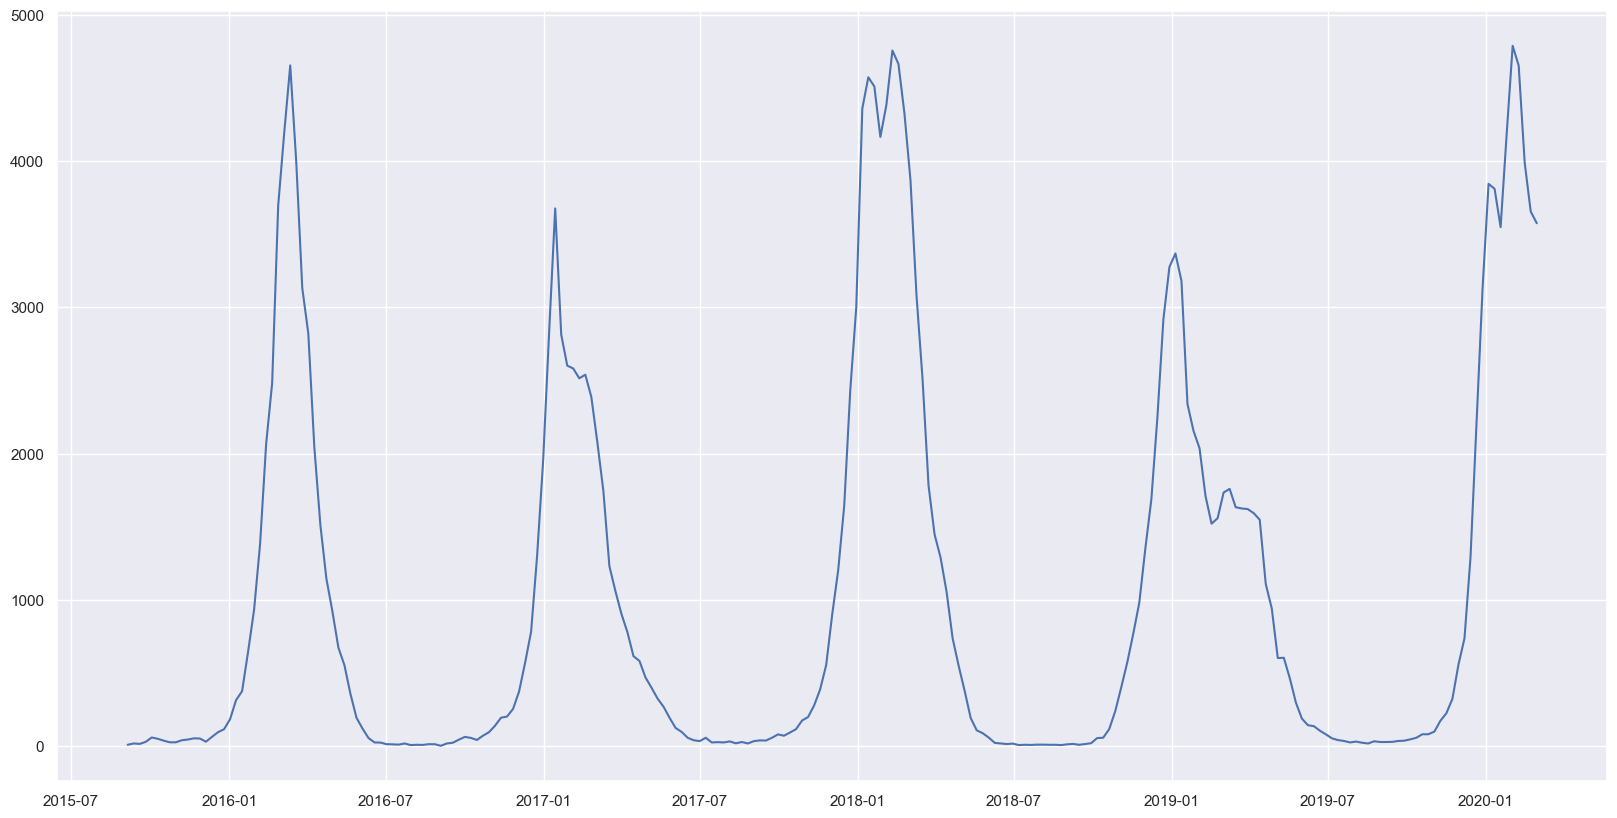

In [92]:
plt.plot(df_flu_pre_COVID)
plt.show()

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [94]:
# fix random seed for reproducibility
tf.random.set_seed(2022)

In [95]:
dataset = df_flu_pre_COVID.values

In [96]:
dataset

array([[9.000e+00],
       [1.800e+01],
       [1.500e+01],
       [2.900e+01],
       [5.900e+01],
       [5.000e+01],
       [3.700e+01],
       [2.600e+01],
       [2.600e+01],
       [4.000e+01],
       [4.500e+01],
       [5.300e+01],
       [5.200e+01],
       [3.000e+01],
       [6.300e+01],
       [9.500e+01],
       [1.150e+02],
       [1.830e+02],
       [3.140e+02],
       [3.750e+02],
       [6.450e+02],
       [9.330e+02],
       [1.386e+03],
       [2.067e+03],
       [2.484e+03],
       [3.697e+03],
       [4.193e+03],
       [4.655e+03],
       [3.994e+03],
       [3.132e+03],
       [2.822e+03],
       [2.045e+03],
       [1.514e+03],
       [1.146e+03],
       [9.220e+02],
       [6.730e+02],
       [5.530e+02],
       [3.570e+02],
       [1.940e+02],
       [1.200e+02],
       [5.500e+01],
       [2.500e+01],
       [2.400e+01],
       [1.300e+01],
       [1.200e+01],
       [1.000e+01],
       [1.800e+01],
       [7.000e+00],
       [9.000e+00],
       [8.000e+00],


In [97]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [98]:
dataset

array([[0.00146229],
       [0.00334239],
       [0.00271569],
       [0.00564028],
       [0.01190725],
       [0.01002716],
       [0.00731147],
       [0.00501358],
       [0.00501358],
       [0.00793817],
       [0.00898266],
       [0.01065385],
       [0.01044496],
       [0.00584917],
       [0.01274285],
       [0.01942762],
       [0.0236056 ],
       [0.03781074],
       [0.06517652],
       [0.07791936],
       [0.13432212],
       [0.19448506],
       [0.28911636],
       [0.43137665],
       [0.51848757],
       [0.77188218],
       [0.87549614],
       [0.97200752],
       [0.83392521],
       [0.65385419],
       [0.58909547],
       [0.42678086],
       [0.31585544],
       [0.23898057],
       [0.19218717],
       [0.1401713 ],
       [0.11510341],
       [0.07415918],
       [0.04010863],
       [0.02465009],
       [0.01107165],
       [0.00480468],
       [0.00459578],
       [0.00229789],
       [0.00208899],
       [0.00167119],
       [0.00334239],
       [0.001

In [99]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

157 78


In [102]:
train

array([[0.00146229],
       [0.00334239],
       [0.00271569],
       [0.00564028],
       [0.01190725],
       [0.01002716],
       [0.00731147],
       [0.00501358],
       [0.00501358],
       [0.00793817],
       [0.00898266],
       [0.01065385],
       [0.01044496],
       [0.00584917],
       [0.01274285],
       [0.01942762],
       [0.0236056 ],
       [0.03781074],
       [0.06517652],
       [0.07791936],
       [0.13432212],
       [0.19448506],
       [0.28911636],
       [0.43137665],
       [0.51848757],
       [0.77188218],
       [0.87549614],
       [0.97200752],
       [0.83392521],
       [0.65385419],
       [0.58909547],
       [0.42678086],
       [0.31585544],
       [0.23898057],
       [0.19218717],
       [0.1401713 ],
       [0.11510341],
       [0.07415918],
       [0.04010863],
       [0.02465009],
       [0.01107165],
       [0.00480468],
       [0.00459578],
       [0.00229789],
       [0.00208899],
       [0.00167119],
       [0.00334239],
       [0.001

In [103]:
test

array([[0.00271569],
       [0.00146229],
       [0.00250679],
       [0.00376018],
       [0.01107165],
       [0.01148945],
       [0.0238145 ],
       [0.04930019],
       [0.08355964],
       [0.11907249],
       [0.16022561],
       [0.20451222],
       [0.28159599],
       [0.35199499],
       [0.46856069],
       [0.60914978],
       [0.68393566],
       [0.70336328],
       [0.66429914],
       [0.4881972 ],
       [0.44996867],
       [0.42510967],
       [0.35659077],
       [0.31731774],
       [0.325047  ],
       [0.36181324],
       [0.36703572],
       [0.34092333],
       [0.33904324],
       [0.33820765],
       [0.33235847],
       [0.32295801],
       [0.23104241],
       [0.19615626],
       [0.12533946],
       [0.12575726],
       [0.09630249],
       [0.06183413],
       [0.03885523],
       [0.02945477],
       [0.02799248],
       [0.02151661],
       [0.01629413],
       [0.01065385],
       [0.00814706],
       [0.00689367],
       [0.00480468],
       [0.006

In [101]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [104]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [105]:
trainX

array([[0.00146229],
       [0.00334239],
       [0.00271569],
       [0.00564028],
       [0.01190725],
       [0.01002716],
       [0.00731147],
       [0.00501358],
       [0.00501358],
       [0.00793817],
       [0.00898266],
       [0.01065385],
       [0.01044496],
       [0.00584917],
       [0.01274285],
       [0.01942762],
       [0.0236056 ],
       [0.03781074],
       [0.06517652],
       [0.07791936],
       [0.13432212],
       [0.19448506],
       [0.28911636],
       [0.43137665],
       [0.51848757],
       [0.77188218],
       [0.87549614],
       [0.97200752],
       [0.83392521],
       [0.65385419],
       [0.58909547],
       [0.42678086],
       [0.31585544],
       [0.23898057],
       [0.19218717],
       [0.1401713 ],
       [0.11510341],
       [0.07415918],
       [0.04010863],
       [0.02465009],
       [0.01107165],
       [0.00480468],
       [0.00459578],
       [0.00229789],
       [0.00208899],
       [0.00167119],
       [0.00334239],
       [0.001

In [106]:
testY

array([0.00146229, 0.00250679, 0.00376018, 0.01107165, 0.01148945,
       0.0238145 , 0.04930019, 0.08355964, 0.11907249, 0.16022561,
       0.20451222, 0.28159599, 0.35199499, 0.46856069, 0.60914978,
       0.68393566, 0.70336328, 0.66429914, 0.4881972 , 0.44996867,
       0.42510967, 0.35659077, 0.31731774, 0.325047  , 0.36181324,
       0.36703572, 0.34092333, 0.33904324, 0.33820765, 0.33235847,
       0.32295801, 0.23104241, 0.19615626, 0.12533946, 0.12575726,
       0.09630249, 0.06183413, 0.03885523, 0.02945477, 0.02799248,
       0.02151661, 0.01629413, 0.01065385, 0.00814706, 0.00689367,
       0.00480468, 0.00605807, 0.00438688, 0.00334239, 0.00647587,
       0.00543138, 0.00543138, 0.00564028, 0.00689367, 0.00731147,
       0.00919156, 0.01148945, 0.01650303, 0.01650303, 0.02026321,
       0.03572175, 0.0465845 , 0.06726551, 0.115939  , 0.15354084,
       0.26906204, 0.46041362, 0.65260079, 0.80279925, 0.79569668,
       0.74096511, 0.87319825, 1.        , 0.97179862, 0.83288

In [107]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [108]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
155/155 - 1s - loss: 0.1133 - 1s/epoch - 7ms/step
Epoch 2/100
155/155 - 0s - loss: 0.0903 - 127ms/epoch - 817us/step
Epoch 3/100
155/155 - 0s - loss: 0.0804 - 121ms/epoch - 779us/step
Epoch 4/100
155/155 - 0s - loss: 0.0729 - 121ms/epoch - 781us/step
Epoch 5/100
155/155 - 0s - loss: 0.0653 - 120ms/epoch - 774us/step
Epoch 6/100
155/155 - 0s - loss: 0.0570 - 119ms/epoch - 768us/step
Epoch 7/100
155/155 - 0s - loss: 0.0488 - 128ms/epoch - 823us/step
Epoch 8/100
155/155 - 0s - loss: 0.0388 - 195ms/epoch - 1ms/step
Epoch 9/100
155/155 - 0s - loss: 0.0297 - 165ms/epoch - 1ms/step
Epoch 10/100
155/155 - 0s - loss: 0.0216 - 124ms/epoch - 799us/step
Epoch 11/100
155/155 - 0s - loss: 0.0149 - 120ms/epoch - 777us/step
Epoch 12/100
155/155 - 0s - loss: 0.0101 - 122ms/epoch - 789us/step
Epoch 13/100
155/155 - 0s - loss: 0.0071 - 123ms/epoch - 796us/step
Epoch 14/100
155/155 - 0s - loss: 0.0057 - 124ms/epoch - 799us/step
Epoch 15/100
155/155 - 0s - loss: 0.0051 - 122ms/epoch - 788us/ste

In [109]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 [==============================] - 0s 2ms/step
Train Score: 308.48 RMSE
Test Score: 300.17 RMSE


In [114]:
testY[0][-1]

3656.0

In [116]:
testPredict[:,0][-1]

3864.4495

In [119]:
testScore = np.sqrt(mean_squared_error(testY[0][-1].reshape(1,-1), testPredict[:,0][-1].reshape(1,-1)))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 208.45 RMSE


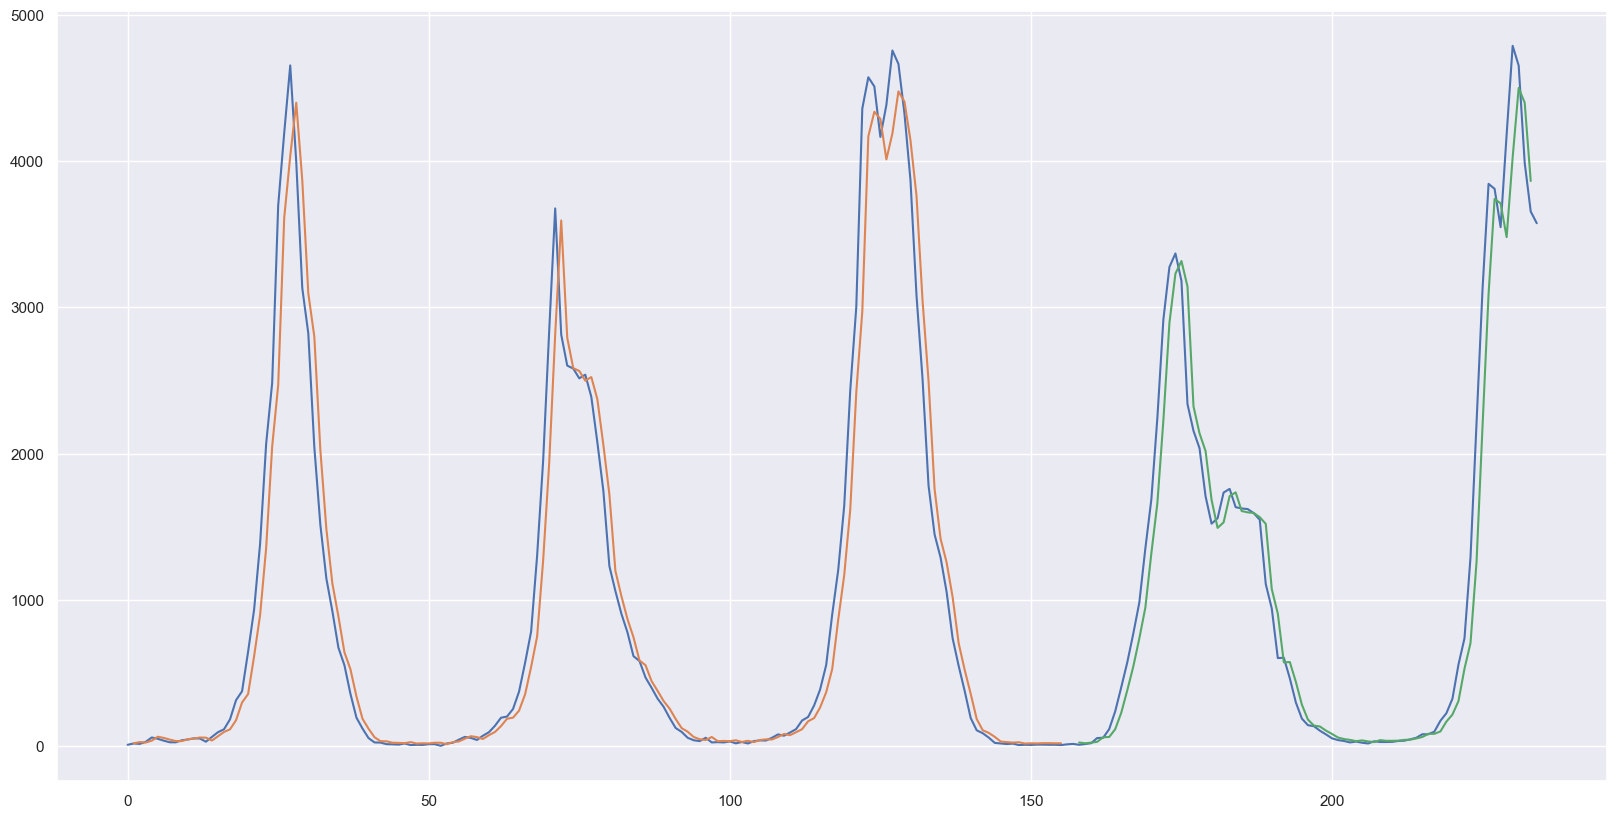

In [110]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [143]:
# import
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
tf.random.set_seed(2022)

# load the dataset
dataframe = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# # # split into train and test sets
# X = dataset.loc[:, dataset.columns != 'Total Cases']
# y = dataset['Total Cases']

# train_X = X[:-1]
# train_y = y[:-1]
# test_X = X[-1]
# test_y = np.asarray(y[-1])

train_size = int(len(dataset) -1)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# # create and fit the LSTM network
# model = Sequential()
# model.add(LSTM(4, input_shape=(1, look_back)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# # make predictions
# trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)

# invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])

# # calculate root mean squared error
# trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

# # shift train predictions for plotting
# trainPredictPlot = np.empty_like(dataset)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# # shift test predictions for plotting
# testPredictPlot = np.empty_like(dataset)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

IndexError: tuple index out of range

In [128]:
train_size

234

In [129]:
test_size

1

In [131]:
train

array([[0.00146229],
       [0.00334239],
       [0.00271569],
       [0.00564028],
       [0.01190725],
       [0.01002716],
       [0.00731147],
       [0.00501358],
       [0.00501358],
       [0.00793817],
       [0.00898266],
       [0.01065385],
       [0.01044496],
       [0.00584917],
       [0.01274285],
       [0.01942762],
       [0.0236056 ],
       [0.03781074],
       [0.06517652],
       [0.07791936],
       [0.13432212],
       [0.19448507],
       [0.28911635],
       [0.43137664],
       [0.5184876 ],
       [0.77188224],
       [0.87549615],
       [0.9720076 ],
       [0.83392525],
       [0.6538542 ],
       [0.5890955 ],
       [0.42678088],
       [0.31585544],
       [0.23898058],
       [0.19218718],
       [0.1401713 ],
       [0.1151034 ],
       [0.07415918],
       [0.04010863],
       [0.02465009],
       [0.01107165],
       [0.00480468],
       [0.00459578],
       [0.00229789],
       [0.00208899],
       [0.00167119],
       [0.00334239],
       [0.001

In [132]:
test

array([[0.7466054]], dtype=float32)

In [141]:
trainX[0]

array([0.00146229, 0.00334239, 0.00271569, 0.00564028, 0.01190725,
       0.01002716, 0.00731147], dtype=float32)

In [142]:
trainY[0]

0.0050135786

In [147]:
testX

array([], dtype=float64)

In [138]:
testY

array([], dtype=float64)